In [4]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. loading data
file_path = "DryBeanDataset/Dry_Bean_Dataset.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

# 2. encoding categorical labels
le = LabelEncoder()
df['Class_encoded'] = le.fit_transform(df['Class'])

C:\Users\lyl61\AppData\Local\Temp\ipykernel_33540\3662040497.py:46: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


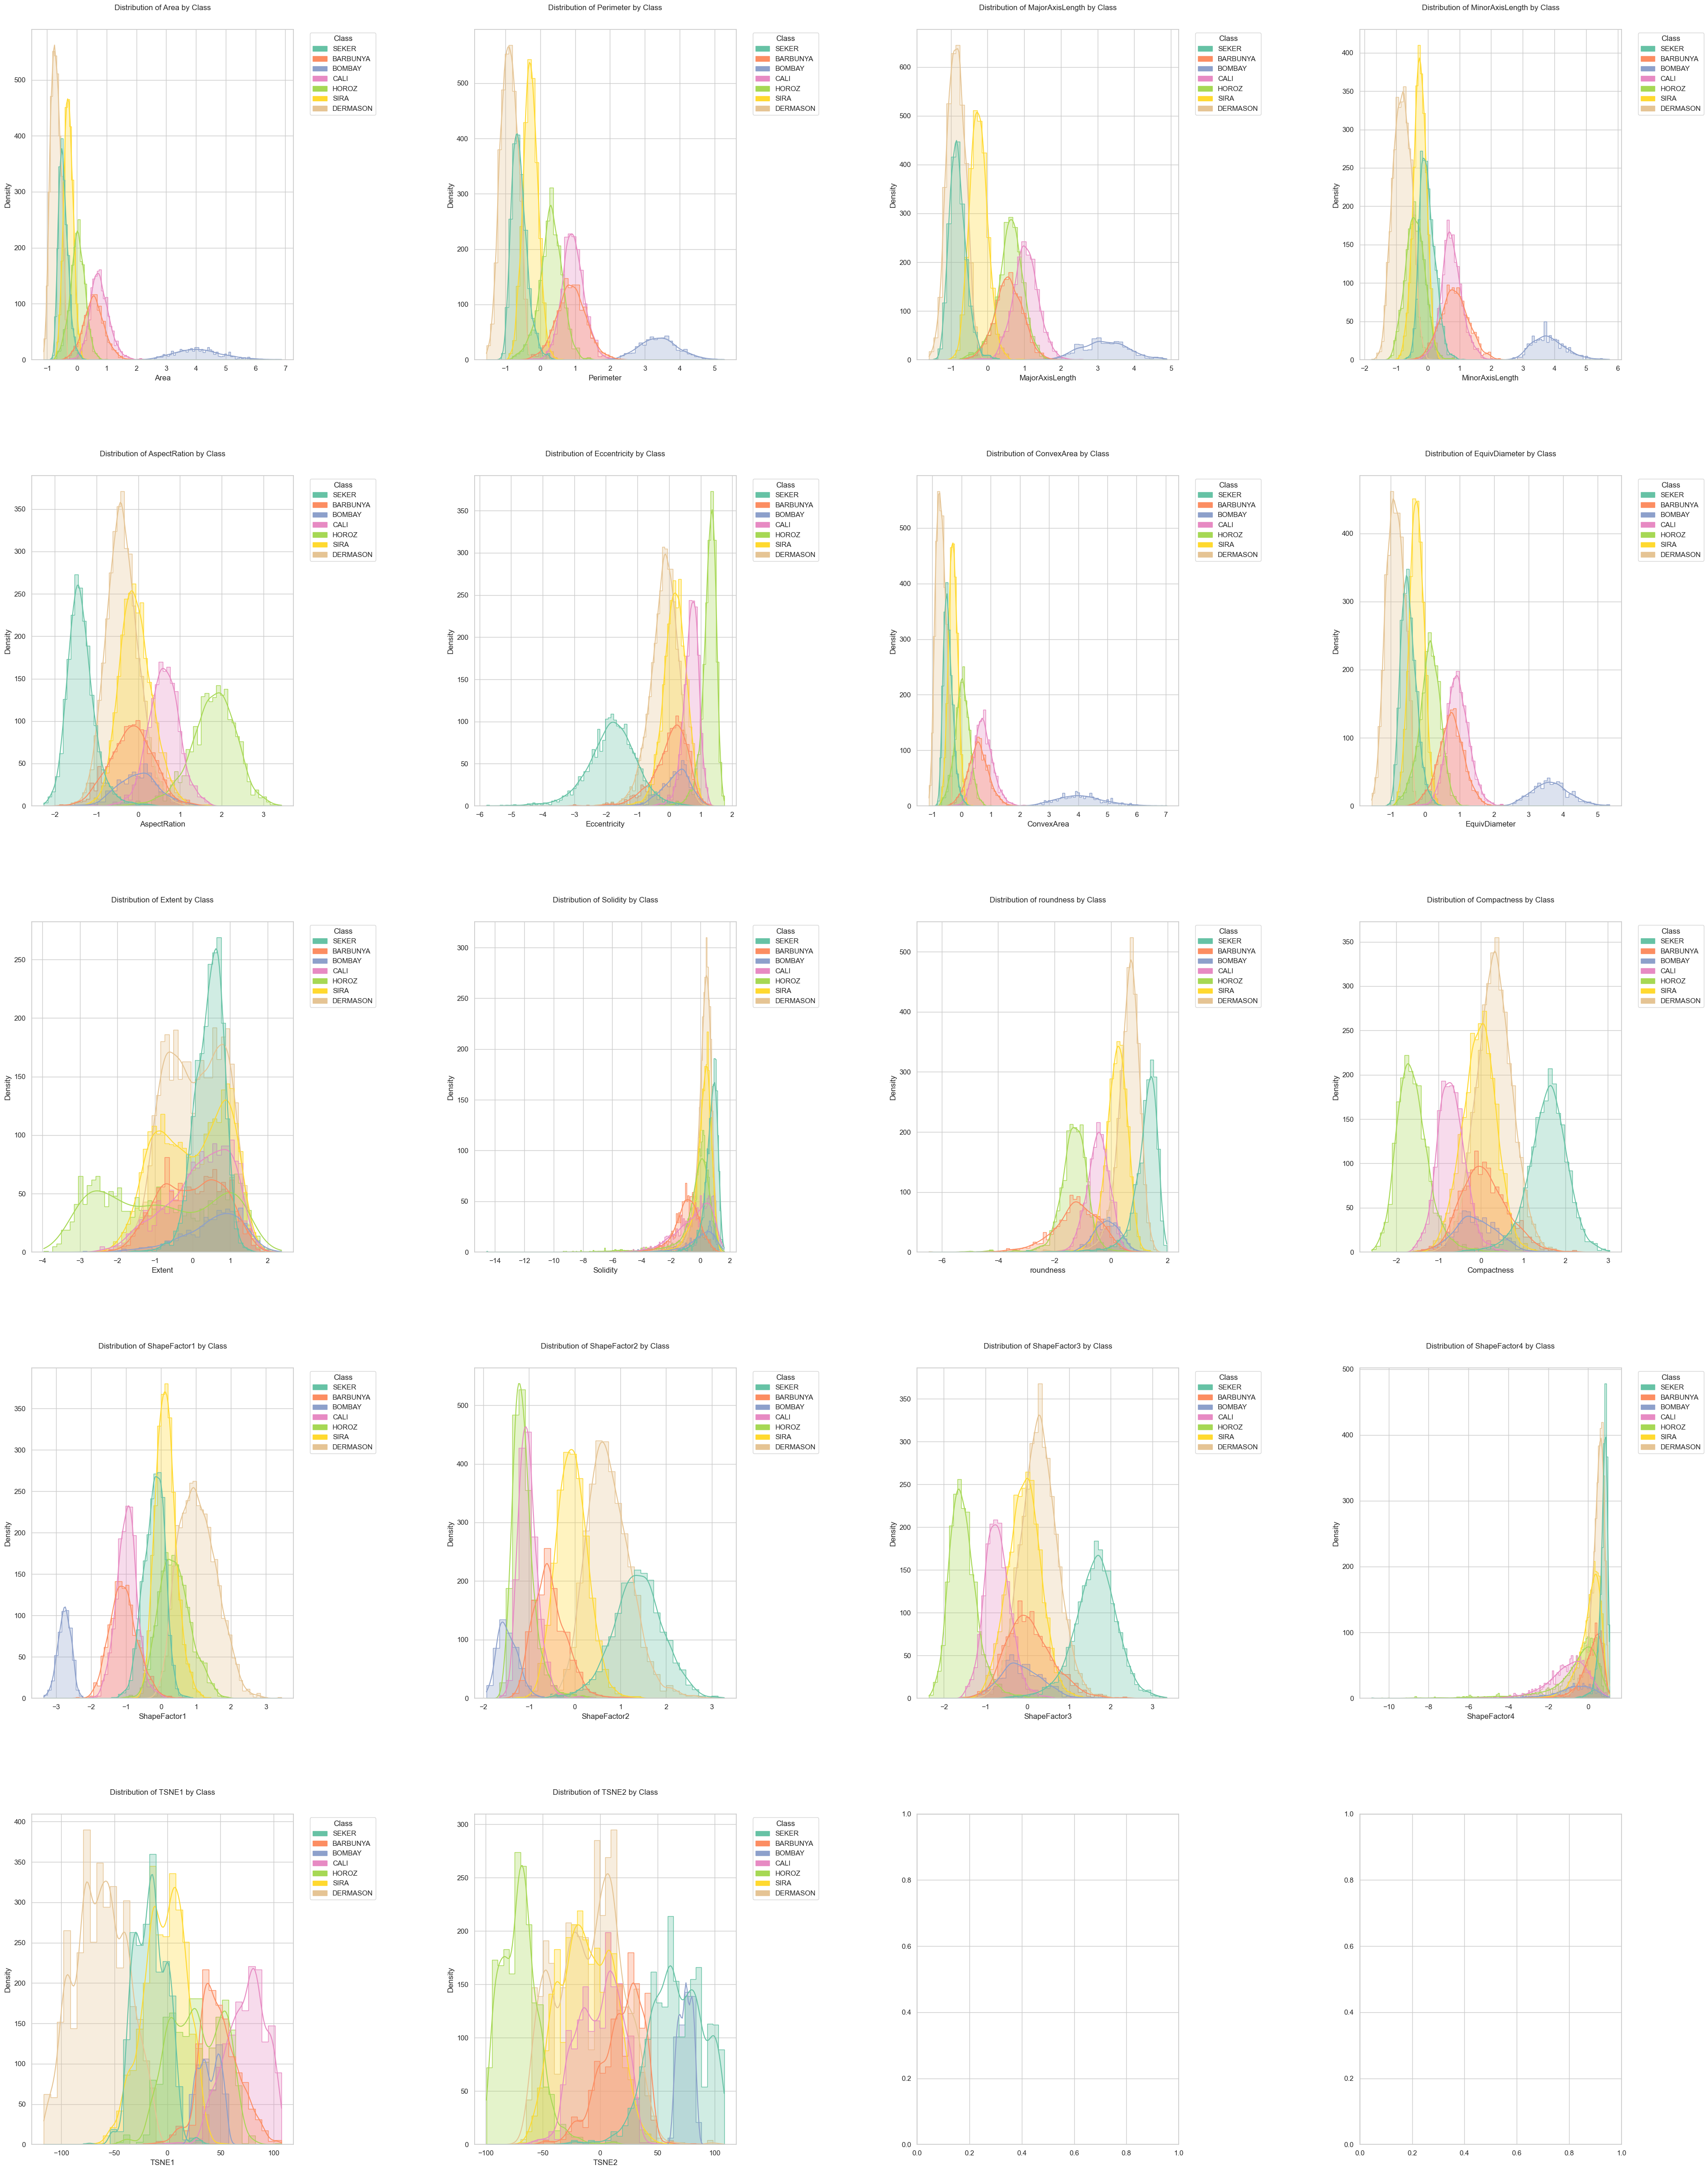

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd

sns.set_theme(style="whitegrid", palette="pastel")

features = df.columns.drop(['Class', 'Class_encoded']).tolist()

num_features = len(features)
ncols = 4
nrows = math.ceil(num_features / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(40, 10 * nrows))  # 指定整体图片大小

plt.rcParams['font.size'] = 100

for i, feature in enumerate(features):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    
    sns.histplot(
        data=df,
        x=feature,
        hue='Class',
        element="step",  
        kde=True,        
        palette="Set2",  
        alpha=0.3,       
        ax=ax            
    )
    
    ax.set_title(f'Distribution of {feature} by Class', pad=30)
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    
    import matplotlib.patches as mpatches

    classes = df['Class'].unique()

    legend_patches = [mpatches.Patch(color=sns.color_palette("Set2")[i], label=cls) for i, cls in enumerate(classes)]

    ax.legend(handles=legend_patches, title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')

plt.show()

sns.reset_orig()

In [6]:
class_col = df[['Class', 'Class_encoded']].copy()

features_to_scale = df.columns.drop(['Class', 'Class_encoded'])

scaler = StandardScaler()
scaled_features = pd.DataFrame(
    scaler.fit_transform(df[features_to_scale]),
    columns=features_to_scale
)

processed_df = pd.concat([scaled_features, class_col], axis=1)
processed_df = processed_df[df.columns]

processed_df.to_csv("data_processed.csv", index=False)

PC1: explained variance = 0.5547, cumulative explained variance = 0.5547
PC2: explained variance = 0.2643, cumulative explained variance = 0.8190
PC3: explained variance = 0.0801, cumulative explained variance = 0.8990
PC4: explained variance = 0.0511, cumulative explained variance = 0.9502
PC5: explained variance = 0.0274, cumulative explained variance = 0.9776
PC6: explained variance = 0.0115, cumulative explained variance = 0.9891
PC7: explained variance = 0.0070, cumulative explained variance = 0.9960
PC8: explained variance = 0.0033, cumulative explained variance = 0.9993
PC9: explained variance = 0.0005, cumulative explained variance = 0.9998
PC10: explained variance = 0.0001, cumulative explained variance = 0.9999


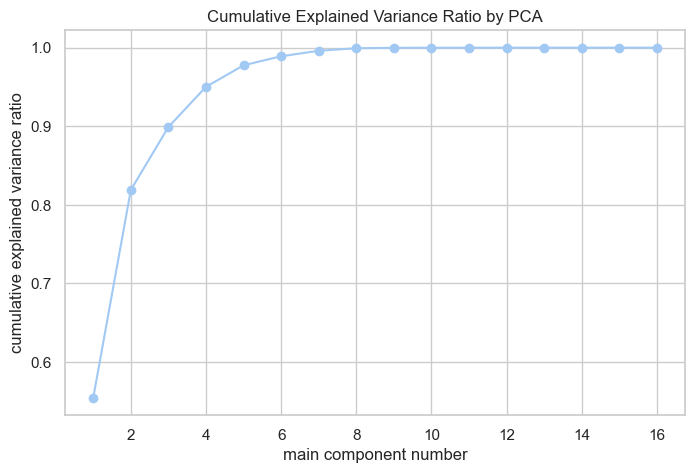

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. loading data
df = pd.read_csv('data_processed.csv')
X = df.drop(columns=['Class', 'Class_encoded'])

# 2. train PCA
pca = PCA(n_components=X.shape[1])
pca.fit(X)

# loadings = pd.DataFrame(
#     pca.components_.T,                # transpose the components
#     index=X.columns,                  # use original feature names
#     columns=[f'PC{i}' for i in range(1, X.shape[1]+1)]
# )
# print("\n components:")
# print(loadings)

# 3. calculate explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# 4. print explained variance 
for i, (var, cum_var) in enumerate(zip(explained_variance[:10], cumulative_variance[:10]), start=1):
    print(f'PC{i}: explained variance = {var:.4f}, cumulative explained variance = {cum_var:.4f}')

# 5. plot explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('main component number')
plt.ylabel('cumulative explained variance ratio')
plt.title('Cumulative Explained Variance Ratio by PCA')
plt.grid(True)
plt.show()


Correlation matrix:
                     Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966722         0.931834         0.951602   
Perimeter        0.966722   1.000000         0.977338         0.913179   
MajorAxisLength  0.931834   0.977338         1.000000         0.826052   
MinorAxisLength  0.951602   0.913179         0.826052         1.000000   
AspectRation     0.241735   0.385276         0.550335        -0.009161   
Eccentricity     0.267481   0.391066         0.541972         0.019574   
ConvexArea       0.999939   0.967689         0.932607         0.951339   
EquivDiameter    0.984968   0.991380         0.961733         0.948539   
Extent           0.054345  -0.021160        -0.078062         0.145957   
Solidity        -0.196585  -0.303970        -0.284302        -0.155831   
roundness       -0.357530  -0.547647        -0.596358        -0.210344   
Compactness     -0.268067  -0.406857        -0.568377        -0.015066   
ShapeFactor1    -0

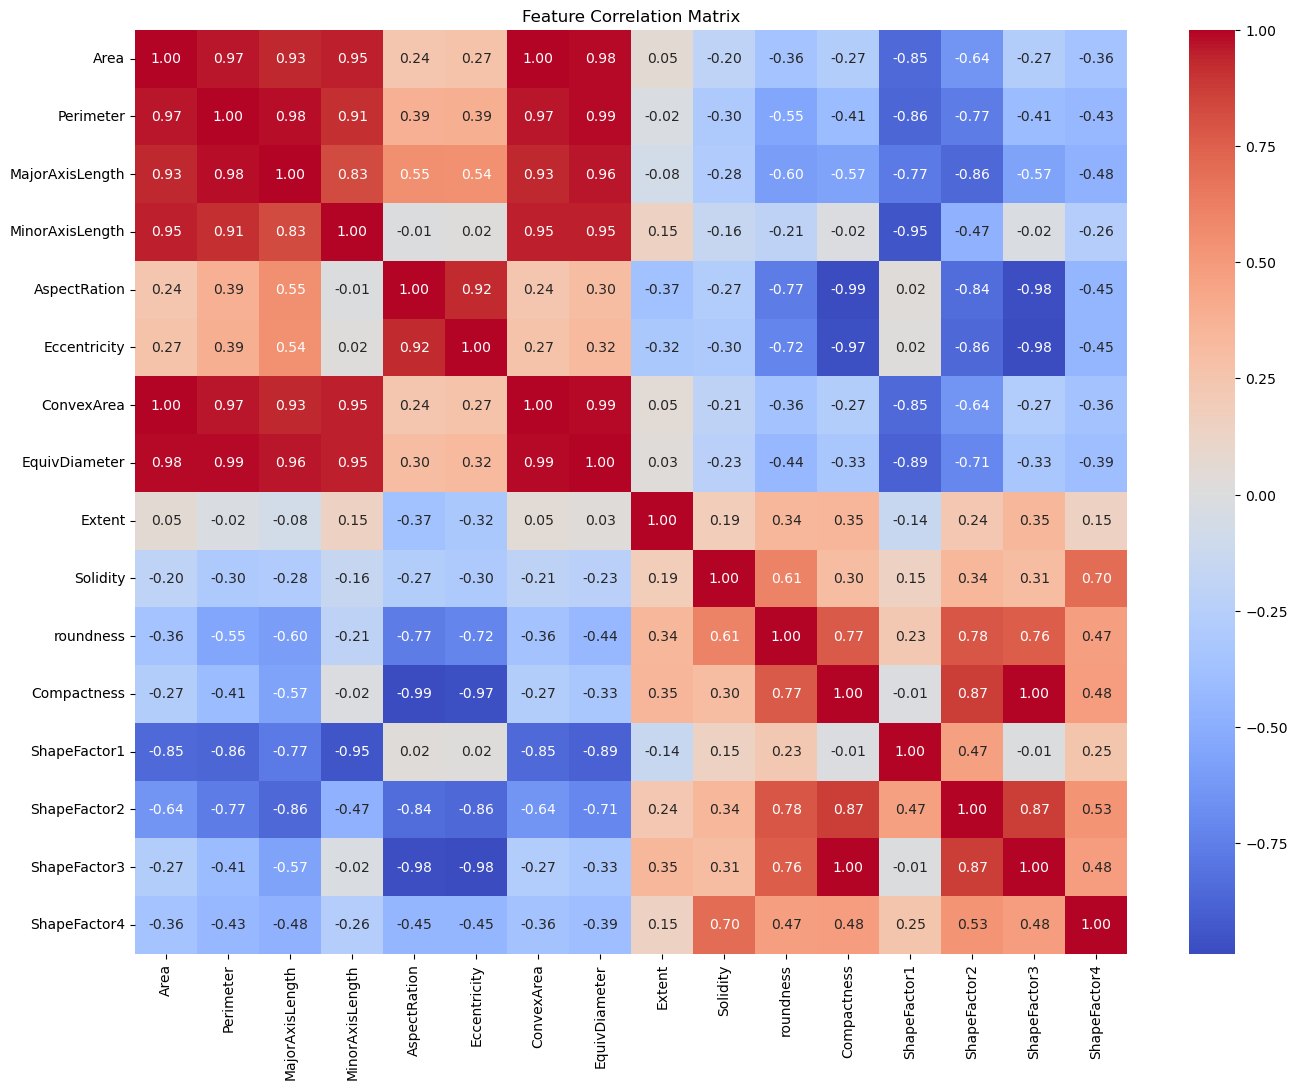

In [26]:
plt.figure(figsize=(16, 12))
corr_matrix = df.drop(['Class','Class_encoded'], axis=1).corr()
print("Correlation matrix:")
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.savefig('feature_correlation.png', dpi=300)
plt.show()

Mutual Information ranking:
Perimeter          1.056907
ConvexArea         1.038620
EquivDiameter      1.037148
Area               1.036810
MajorAxisLength    0.996402
ShapeFactor2       0.954664
ShapeFactor1       0.931071
MinorAxisLength    0.928023
Compactness        0.835602
ShapeFactor3       0.835584
Eccentricity       0.819633
AspectRation       0.819608
roundness          0.799560
ShapeFactor4       0.366569
Solidity           0.234112
Extent             0.198957
dtype: float64

Random Forest Feature Importance ranking:
ShapeFactor3       0.100488
ShapeFactor1       0.090669
Perimeter          0.087576
Compactness        0.084921
MajorAxisLength    0.079159
MinorAxisLength    0.078372
ConvexArea         0.074243
Eccentricity       0.068651
EquivDiameter      0.065027
AspectRation       0.064605
Area               0.056031
roundness          0.052236
ShapeFactor2       0.036999
ShapeFactor4       0.030924
Solidity           0.018594
Extent             0.011506
dtype: float64


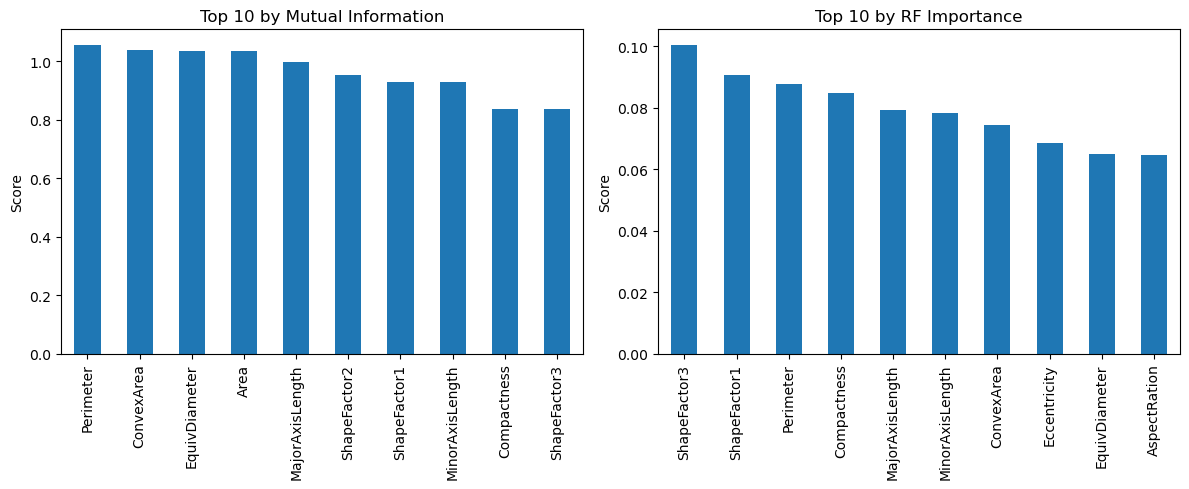


Selected features (top 8 by combined rank):
['Perimeter', 'ConvexArea', 'ShapeFactor1', 'MajorAxisLength', 'ShapeFactor3', 'EquivDiameter', 'Compactness', 'MinorAxisLength']


In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import matplotlib.pyplot as plt

# 1. loading data
df = pd.read_csv('data_processed.csv')
X = df.drop(columns=['Class', 'Class_encoded'])
y = df['Class_encoded']   

# 2. Calculating mutual information
mi = mutual_info_classif(X, y, discrete_features=False, random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("Mutual Information ranking:")
print(mi_series)

# 3. Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)
fi_series = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importance ranking:")
print(fi_series)

# 4. Plotting the top 10 features
top_k = 10
fig, axes = plt.subplots(1, 2, figsize=(12,5))
mi_series[:top_k].plot.bar(ax=axes[0], title=f'Top {top_k} by Mutual Information')
fi_series[:top_k].plot.bar(ax=axes[1], title=f'Top {top_k} by RF Importance')
for ax in axes:
    ax.set_ylabel('Score')
plt.tight_layout()
plt.show()

# 5. Combining rankings
combined_score = (mi_series.rank(ascending=False) + fi_series.rank(ascending=False)) / 2
combined = combined_score.sort_values().index.tolist()
selected_features = combined[:8]
print("\nSelected features (top 8 by combined rank):")
print(selected_features)


c:\Users\lyl61\.conda\envs\jupyter\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\lyl61\.conda\envs\jupyter\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\lyl61\AppData\Local\Temp\ipykernel_33540\1545848510.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(unique_classes))


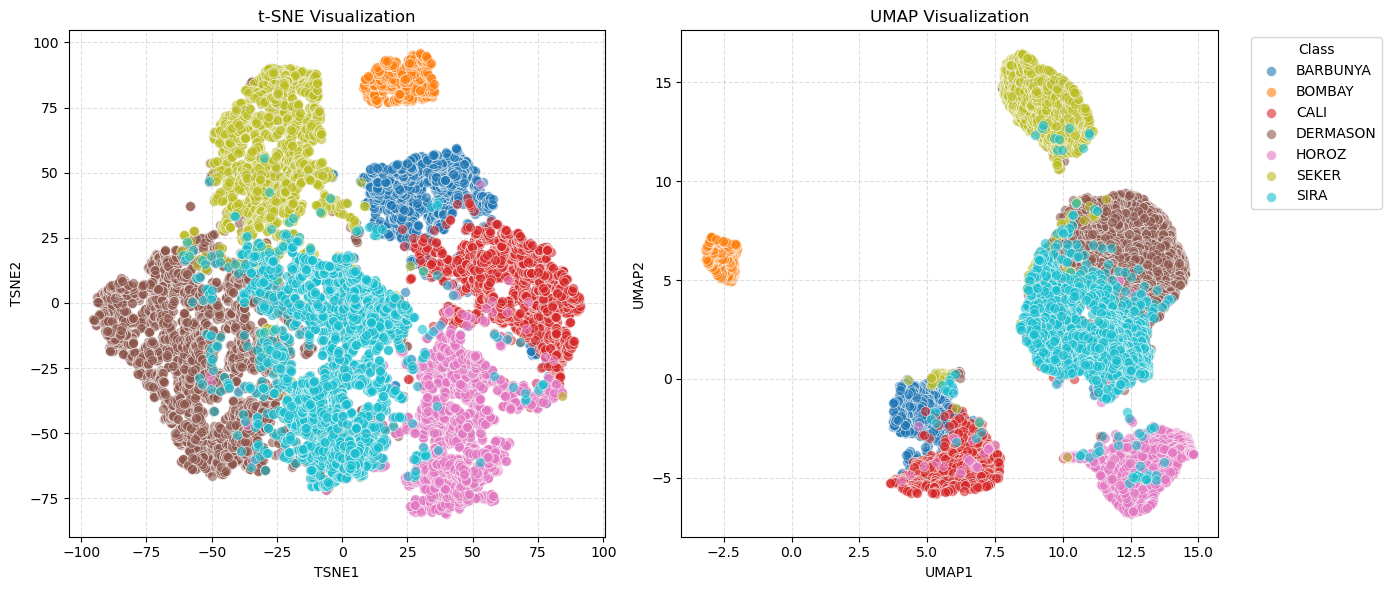

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE
import umap.umap_ as umap

# loading data and features
df = pd.read_csv('data_processed.csv')
features = [
    'Perimeter', 'ConvexArea', 'ShapeFactor1',
    'MajorAxisLength', 'ShapeFactor3', 'EquivDiameter',
    'Compactness', 'MinorAxisLength', 'ShapeFactor2','Area',
    'Eccentricity', 'AspectRation','Solidity',
    'Extent', 'roundness', 'ShapeFactor4'
]
X = df[features]
y = df['Class']

# dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

unique_classes = sorted(y.unique())
colors = cm.get_cmap('tab10', len(unique_classes))
class_to_color = {cls: colors(i) for i, cls in enumerate(unique_classes)}

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# t-SNE 
for cls in unique_classes:
    idx = y == cls
    axes[0].scatter(
        X_tsne[idx, 0], X_tsne[idx, 1],
        label=cls,
        color=class_to_color[cls],
        alpha=0.6,
        edgecolors='w',
        linewidths=0.5,
        s=50
    )
axes[0].set_title('t-SNE Visualization')
axes[0].set_xlabel('TSNE1')
axes[0].set_ylabel('TSNE2')
axes[0].grid(True, linestyle='--', alpha=0.4)

# UMAP 
for cls in unique_classes:
    idx = y == cls
    axes[1].scatter(
        X_umap[idx, 0], X_umap[idx, 1],
        label=cls,
        color=class_to_color[cls],
        alpha=0.6,
        edgecolors='w',
        linewidths=0.5,
        s=50
    )
axes[1].set_title('UMAP Visualization')
axes[1].set_xlabel('UMAP1')
axes[1].set_ylabel('UMAP2')
axes[1].grid(True, linestyle='--', alpha=0.4)

axes[1].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig("dimensionality_comparison.png", dpi=300)
plt.show()


In [11]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import (
    adjusted_rand_score,
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)
import matplotlib.pyplot as plt

df = pd.read_csv('data_processed.csv')
features = [
    'Perimeter', 'ConvexArea', 'ShapeFactor1',
    'MajorAxisLength', 'ShapeFactor3', 'EquivDiameter',
    'Compactness', 'MinorAxisLength','ShapeFactor2',
]
X = df[features]
y_true = df['Class']
n_clusters = y_true.nunique()

tsne_proj = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)
df['TSNE1'], df['TSNE2'] = tsne_proj[:,0], tsne_proj[:,1]

metrics_list = []

methods = {}
for name in ['GaussianMixture','KMeans','Ward']:
    if name=='GaussianMixture':
        model = GaussianMixture(n_components=n_clusters,
                                covariance_type='full',
                                random_state=42)
        y_pred = model.fit_predict(X)
    elif name=='KMeans':
        model = KMeans(n_clusters=n_clusters,
                       n_init='auto',
                       random_state=42)
        y_pred = model.fit_predict(X)
    else:  # Ward
        Z = linkage(X, method='ward')
        y_pred = fcluster(Z, n_clusters, criterion='maxclust') - 1

    # compute metrics
    ari = adjusted_rand_score(y_true, y_pred)
    sil = silhouette_score(X, y_pred)
    ch  = calinski_harabasz_score(X, y_pred)
    db  = davies_bouldin_score(X, y_pred)

    metrics_list.append({
        'Method': name,
        'ARI': ari,
        'Silhouette': sil,
        'Calinski-Harabasz': ch,
        'Davies-Bouldin': db
    })

    # save preds & confusion for plotting later
    cm = pd.crosstab(y_true, y_pred,
                     rownames=['True'], colnames=['Pred'])
    methods[name] = (y_pred, cm)

# 4. Create metrics DataFrame
metrics_df = pd.DataFrame(metrics_list).set_index('Method')
print(metrics_df)


                      ARI  Silhouette  Calinski-Harabasz  Davies-Bouldin
Method                                                                  
GaussianMixture  0.706386    0.435118       19458.011366        0.782976
KMeans           0.696486    0.453440       20556.113103        0.746249
Ward             0.742982    0.423514       18942.183278        0.762995


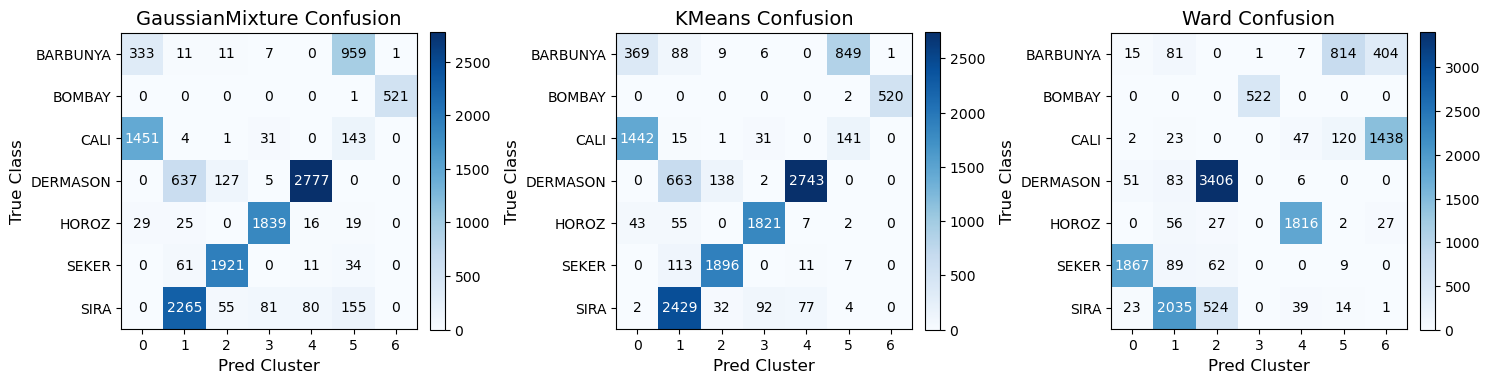


Confusion Matrix for GaussianMixture:
Pred         0     1     2     3     4    5    6
True                                            
BARBUNYA   333    11    11     7     0  959    1
BOMBAY       0     0     0     0     0    1  521
CALI      1451     4     1    31     0  143    0
DERMASON     0   637   127     5  2777    0    0
HOROZ       29    25     0  1839    16   19    0
SEKER        0    61  1921     0    11   34    0
SIRA         0  2265    55    81    80  155    0

Confusion Matrix for KMeans:
Pred         0     1     2     3     4    5    6
True                                            
BARBUNYA   369    88     9     6     0  849    1
BOMBAY       0     0     0     0     0    2  520
CALI      1442    15     1    31     0  141    0
DERMASON     0   663   138     2  2743    0    0
HOROZ       43    55     0  1821     7    2    0
SEKER        0   113  1896     0    11    7    0
SIRA         2  2429    32    92    77    4    0

Confusion Matrix for Ward:
Pred         0     1 

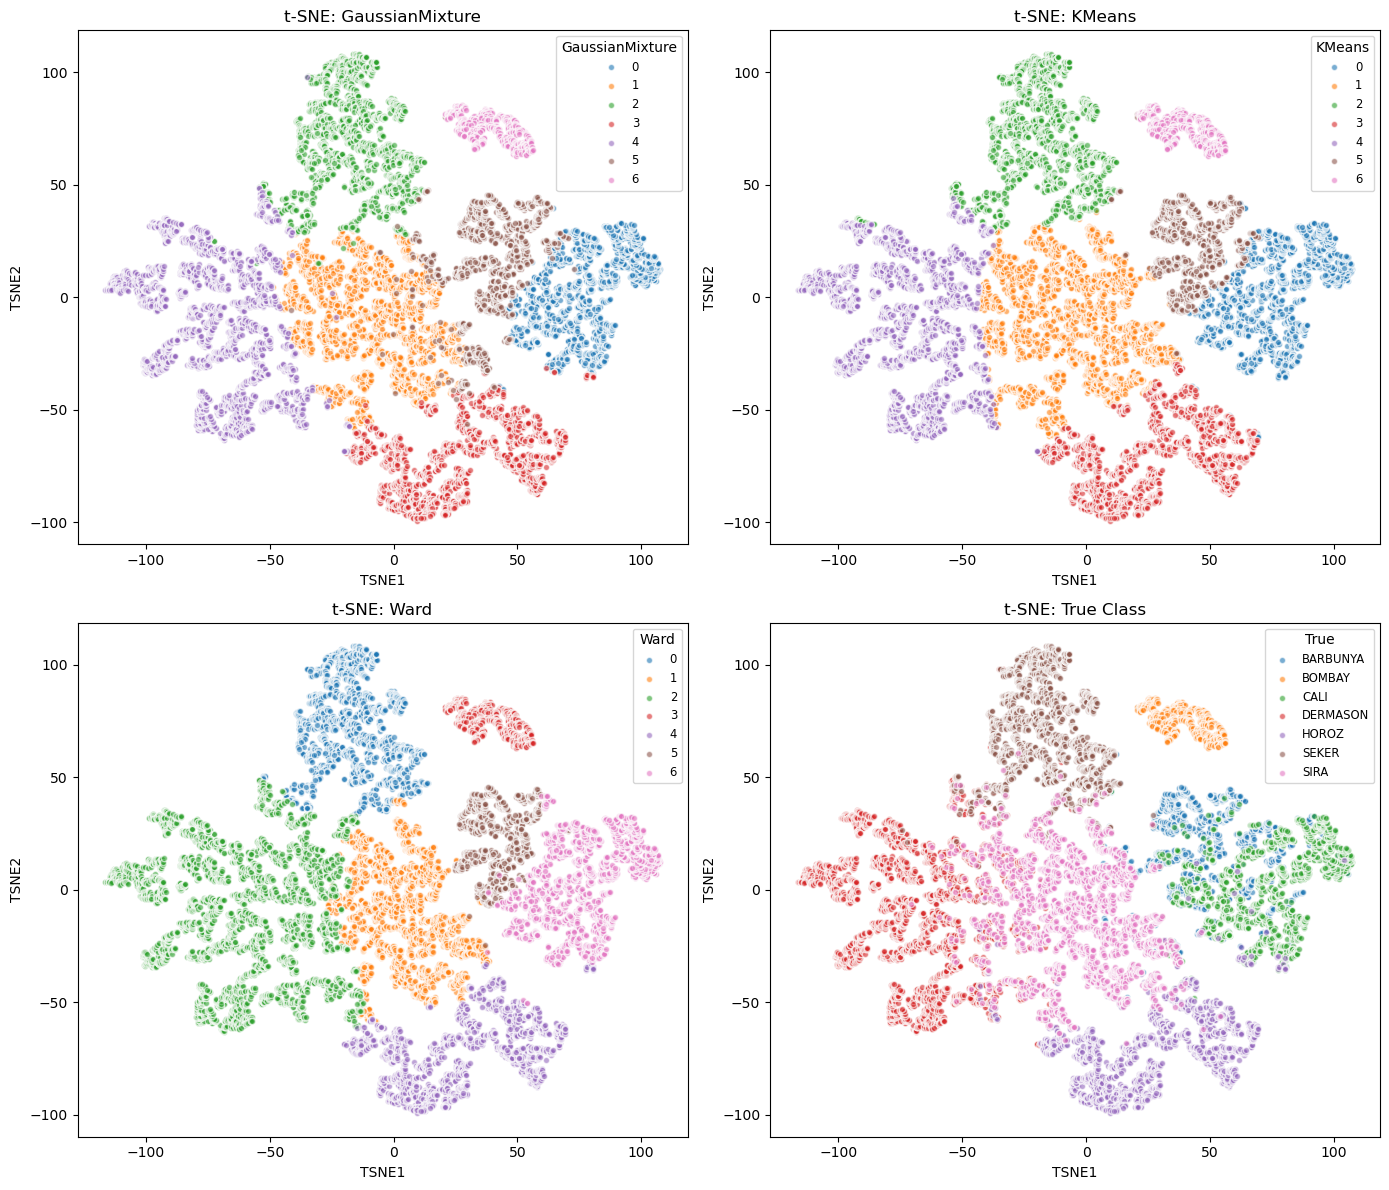

In [23]:
# FIGURE 1: all three confusion matrices in one column
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjusted figsize for better layout
for ax, (name, (y_pred, cm)) in zip(axes, methods.items()):
    im = ax.imshow(cm.values, cmap='Blues', interpolation='nearest')
    ax.set_title(f"{name} Confusion", fontsize=14)  # Title font size
    ax.set_xlabel('Pred Cluster', fontsize=12)  # X-axis label font size
    ax.set_ylabel('True Class', fontsize=12)  # Y-axis label font size
    ax.set_xticks(np.arange(cm.shape[1]))
    ax.set_xticklabels(cm.columns, fontsize=10)  # X-tick labels font size
    ax.set_yticks(np.arange(cm.shape[0]))
    ax.set_yticklabels(cm.index, fontsize=10)  # Y-tick labels font size
    
    thresh = cm.values.max() / 2
    for i, j in np.ndindex(cm.shape):
        ax.text(j, i, cm.iat[i, j],
                ha='center', va='center',
                color='white' if cm.iat[i, j] > thresh else 'black')
    
    # Customize colorbar font size
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=10)  # Colorbar tick labels font size

plt.tight_layout()
plt.savefig("confusion_matrices_column.png", dpi=300)
plt.show()
# Print confusion matrices
for name, (_, cm) in methods.items():
    print(f"\nConfusion Matrix for {name}:")
    print(cm)

# FIGURE 2: 2×2 t-SNE plots (GM, KMeans, Ward, True)
fig, axes = plt.subplots(2,2, figsize=(14,12))
plot_positions = [
    ('GaussianMixture', axes[0,0]),
    ('KMeans',            axes[0,1]),
    ('Ward',              axes[1,0]),
    ('True',              axes[1,1]),
]
for name, ax in plot_positions:
    if name=='True':
        labels = y_true
        title = 't-SNE: True Class'
    else:
        labels = methods[name][0]
        title = f"t-SNE: {name}"
    for lbl in np.unique(labels):
        sel = (labels==lbl)
        ax.scatter(df.loc[sel,'TSNE1'], df.loc[sel,'TSNE2'],
                   s=20, alpha=0.6, label=lbl, edgecolor='w')
    ax.set_title(title)
    ax.set_xlabel('TSNE1');  ax.set_ylabel('TSNE2')
    ax.legend(fontsize='small', title=name)
plt.tight_layout()
plt.savefig("tsne_comparison_2x2.png", dpi=300)
plt.show()

In [27]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. loading data
file_path = "DryBeanDataset/Dry_Bean_Dataset.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

# 2. encoding categorical labels
le = LabelEncoder()
df['Class_encoded'] = le.fit_transform(df['Class'])
features = df.columns.drop(['Class', 'Class_encoded']).tolist()
df["Elongation"] = df["AspectRation"] * (1 - df["roundness"])
df["KidneyScore"]=(1 - df["ShapeFactor4"]) * df["EquivDiameter"]
df["TextureHint"] = df["Solidity"] * df["Compactness"] 
df["ShapeScore1"]=df["Eccentricity"] * df["AspectRation"]
df["ShapeScore2"]=df["ShapeFactor2"]/df["ShapeFactor3"]
df["BoundaryComplexity"]=df["ShapeFactor4"]*(1/df["Solidity"])
df["logArea"] = df["Area"].apply(lambda x: 0 if x == 0 else np.log(x))
df["logConvexArea"] = df["ConvexArea"].apply(lambda x: 0 if x == 0 else np.log(x))
df["logPerimeter"] = df["Perimeter"].apply(lambda x: 0 if x == 0 else np.log(x))
features.append("Elongation")
features.append("TextureHint")
features.append("KidneyScore")
features.append("ShapeScore1")
features.append("ShapeScore2")
features.append("BoundaryComplexity")
features.append("logArea")
features.append("logConvexArea")
features.append("logPerimeter")

class_col = df[['Class', 'Class_encoded']].copy()

features_to_scale = df.columns.drop(['Class', 'Class_encoded'])

# scaling features using Z-score normalization
scaler = StandardScaler()
scaled_features = pd.DataFrame(
    scaler.fit_transform(df[features_to_scale]),
    columns=features_to_scale
)
processed_df = pd.concat([scaled_features, class_col], axis=1)
processed_df = processed_df[df.columns]
processed_df.to_csv("data_processed_featured.csv", index=False)


In [28]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import adjusted_rand_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# read the processed data
df = pd.read_csv('data_processed_featured.csv')
features = [
    'Perimeter', 'ShapeFactor1', 'MinorAxisLength', 
    'EquivDiameter', 'MajorAxisLength', 'ConvexArea', 
    "ShapeFactor3","ShapeFactor2",'Compactness',"KidneyScore","TextureHint","Elongation",
]
X = df[features]
y_true = df['Class']
n_clusters = y_true.nunique()

tsne_proj = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)
df['TSNE1'], df['TSNE2'] = tsne_proj[:,0], tsne_proj[:,1]

metrics_list = []

methods = {}
for name in ['GaussianMixture','KMeans','Ward']:
    if name=='GaussianMixture':
        model = GaussianMixture(n_components=n_clusters,
                                covariance_type='full',
                                random_state=42)
        y_pred = model.fit_predict(X)
    elif name=='KMeans':
        model = KMeans(n_clusters=n_clusters,
                       n_init='auto',
                       random_state=42)
        y_pred = model.fit_predict(X)
    else:  # Ward
        Z = linkage(X, method='ward')
        y_pred = fcluster(Z, n_clusters, criterion='maxclust') - 1

    # compute metrics
    ari = adjusted_rand_score(y_true, y_pred)
    sil = silhouette_score(X, y_pred)
    ch  = calinski_harabasz_score(X, y_pred)
    db  = davies_bouldin_score(X, y_pred)

    metrics_list.append({
        'Method': name,
        'ARI': ari,
        'Silhouette': sil,
        'Calinski-Harabasz': ch,
        'Davies-Bouldin': db
    })

    # save preds & confusion for plotting later
    cm = pd.crosstab(y_true, y_pred,
                     rownames=['True'], colnames=['Pred'])
    methods[name] = (y_pred, cm)

# Create metrics DataFrame
metrics_df = pd.DataFrame(metrics_list).set_index('Method')
print(metrics_df)

                      ARI  Silhouette  Calinski-Harabasz  Davies-Bouldin
Method                                                                  
GaussianMixture  0.743048    0.374517       12215.344308        0.994628
KMeans           0.685993    0.391199       13289.119354        0.923573
Ward             0.635448    0.386065       12282.028198        0.886914


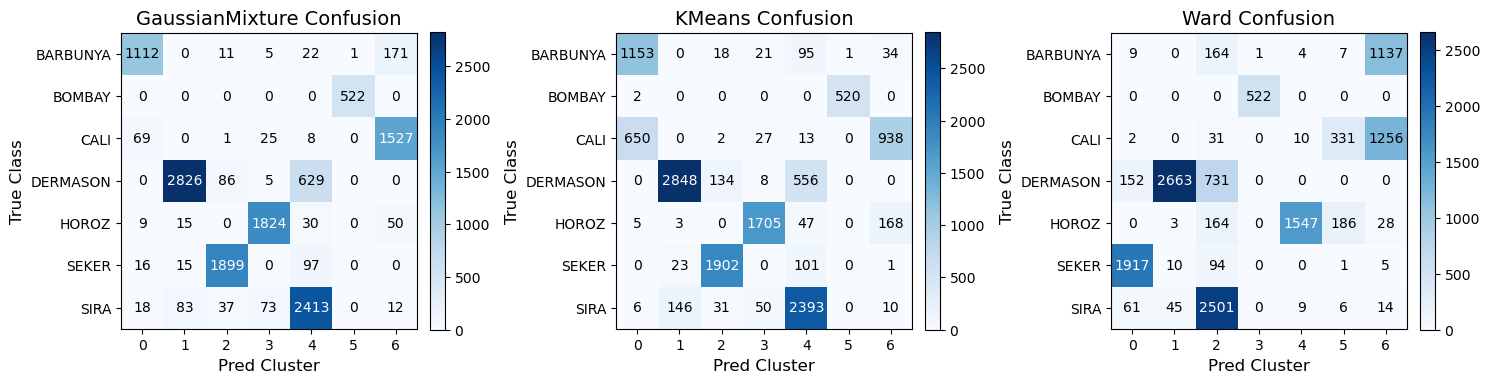


Confusion Matrix for GaussianMixture:
Pred         0     1     2     3     4    5     6
True                                             
BARBUNYA  1112     0    11     5    22    1   171
BOMBAY       0     0     0     0     0  522     0
CALI        69     0     1    25     8    0  1527
DERMASON     0  2826    86     5   629    0     0
HOROZ        9    15     0  1824    30    0    50
SEKER       16    15  1899     0    97    0     0
SIRA        18    83    37    73  2413    0    12

Confusion Matrix for KMeans:
Pred         0     1     2     3     4    5    6
True                                            
BARBUNYA  1153     0    18    21    95    1   34
BOMBAY       2     0     0     0     0  520    0
CALI       650     0     2    27    13    0  938
DERMASON     0  2848   134     8   556    0    0
HOROZ        5     3     0  1705    47    0  168
SEKER        0    23  1902     0   101    0    1
SIRA         6   146    31    50  2393    0   10

Confusion Matrix for Ward:
Pred        

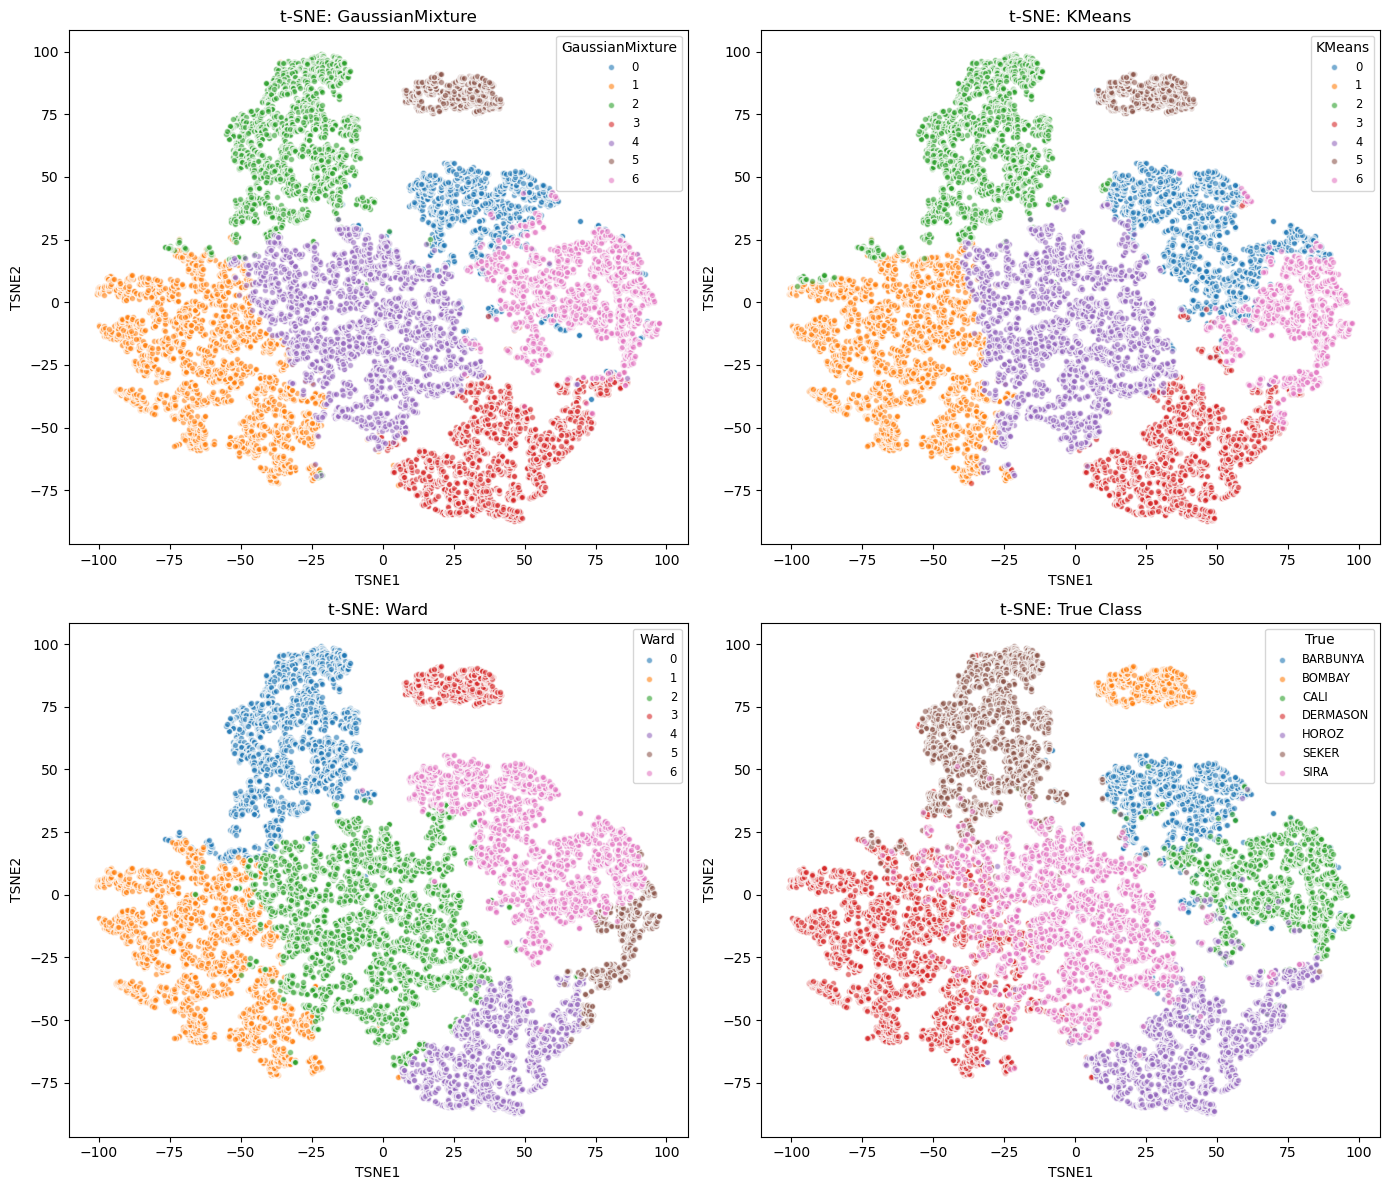

In [ ]:
# FIGURE 1: all three confusion matrices in one column
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjusted figsize for better layout
for ax, (name, (y_pred, cm)) in zip(axes, methods.items()):
    im = ax.imshow(cm.values, cmap='Blues', interpolation='nearest')
    ax.set_title(f"{name} Confusion", fontsize=14)  # Title font size
    ax.set_xlabel('Pred Cluster', fontsize=12)  # X-axis label font size
    ax.set_ylabel('True Class', fontsize=12)  # Y-axis label font size
    ax.set_xticks(np.arange(cm.shape[1]))
    ax.set_xticklabels(cm.columns, fontsize=10)  # X-tick labels font size
    ax.set_yticks(np.arange(cm.shape[0]))
    ax.set_yticklabels(cm.index, fontsize=10)  # Y-tick labels font size
    
    thresh = cm.values.max() / 2
    for i, j in np.ndindex(cm.shape):
        ax.text(j, i, cm.iat[i, j],
                ha='center', va='center',
                color='white' if cm.iat[i, j] > thresh else 'black')
    
    # Customize colorbar font size
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=10)  # Colorbar tick labels font size

plt.tight_layout()
plt.savefig("confusion_matrices_column_f.png", dpi=300)
plt.show()

# Print confusion matrices
for name, (_, cm) in methods.items():
    print(f"\nConfusion Matrix for {name}:")
    print(cm)

# FIGURE 2: 2×2 t-SNE plots (GM, KMeans, Ward, True)
fig, axes = plt.subplots(2,2, figsize=(14,12))
plot_positions = [
    ('GaussianMixture', axes[0,0]),
    ('KMeans',            axes[0,1]),
    ('Ward',              axes[1,0]),
    ('True',              axes[1,1]),
]
for name, ax in plot_positions:
    if name=='True':
        labels = y_true
        title = 't-SNE: True Class'
    else:
        labels = methods[name][0]
        title = f"t-SNE: {name}"
    for lbl in np.unique(labels):
        sel = (labels==lbl)
        ax.scatter(df.loc[sel,'TSNE1'], df.loc[sel,'TSNE2'],
                   s=20, alpha=0.6, label=lbl, edgecolor='w')
    ax.set_title(title)
    ax.set_xlabel('TSNE1');  ax.set_ylabel('TSNE2')
    ax.legend(fontsize='small', title=name)
plt.tight_layout()
plt.savefig("tsne_comparison_2x2_f.png", dpi=300)
plt.show()
